In [1]:
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

import pickle
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ctgan import CTGANSynthesizer
from sklearn.model_selection import train_test_split
from utils import *

MODELS_PATH = './models'
DATA_PATH = './data/'
dataset = 'german'
seed = 1
np.random.seed(seed)

In [2]:
credit = np.genfromtxt('data/german/german.data-numeric')
categorical_features=[]

In [3]:
X, y = credit[:,:-1], credit[:,-1:].squeeze()

In [4]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
preprocessor = get_preprocessor(X, categorical_features)
rf = RandomForestClassifier(n_jobs=-1, random_state=seed)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.770


Epoch 1, Loss G: 0.4596014769809731, loss_bb: 0.4596014769809731
Epoch 2, Loss G: 0.4852364938702807, loss_bb: 0.4852364938702807
Epoch 3, Loss G: 0.4739610895678307, loss_bb: 0.4739610895678307
Epoch 4, Loss G: 0.4633445828691773, loss_bb: 0.4633445828691773
Epoch 5, Loss G: 0.46535721239066036, loss_bb: 0.46535721239066036
Epoch 6, Loss G: 0.4954677948918509, loss_bb: 0.4954677948918509
Epoch 7, Loss G: 0.5191661488421225, loss_bb: 0.5191661488421225
Epoch 8, Loss G: 0.49956776340924103, loss_bb: 0.49956776340924103
Epoch 9, Loss G: 0.5011234378204065, loss_bb: 0.5011234378204065
Epoch 10, Loss G: 0.4633752470349906, loss_bb: 0.4633752470349906
Epoch 11, Loss G: 0.4946858926403568, loss_bb: 0.4946858926403568
Epoch 12, Loss G: 0.48132655456741236, loss_bb: 0.48132655456741236
Epoch 13, Loss G: 0.5098663956535456, loss_bb: 0.5098663956535456
Epoch 14, Loss G: 0.4825021496173251, loss_bb: 0.4825021496173251
Epoch 15, Loss G: 0.4948143819399962, loss_bb: 0.4948143819399962
Epoch 16, Los

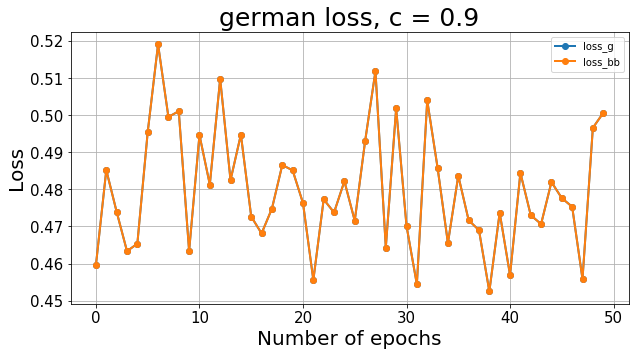

In [9]:
z_features = get_noise_features(X_train, categorical_features)
z_rows = int(0.25 * X_train.shape[0])
z = gen_random_noise(shape=(z_rows, z_features))
batch_size = 50
epochs = 50
confidence_level = 0.9 
gen_lr = 2e-5
loss = 'log'

rf_ctgan = CTGANSynthesizer(batch_size=batch_size, 
                            blackbox_model=rf, 
                            preprocessing_pipeline=preprocessor, 
                            bb_loss=loss
                            )

hist = rf_ctgan.fit(train_data=z, 
                    epochs=epochs,
                    confidence_level=confidence_level,
                    gen_lr=gen_lr,
                    )

rf_ctgan.save(f"{MODELS_PATH}/{dataset}_ctgan_c_{confidence_level}.pkl")

plot_losses(hist, title=f'{dataset} loss, c = {confidence_level}')
print()